Vamos começar importando as bibliotecas básicas

In [16]:
import matplotlib.pyplot as plt # Bibliotega Gráfica
import numpy as np # Cálculos Numéricos

Instalamos o Qiskit com:

In [17]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


Chamando a biblioteca básica

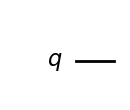

In [20]:
from qiskit import QuantumCircuit # Criamos nosso circuito

circ = QuantumCircuit(1)
circ.draw('mpl')

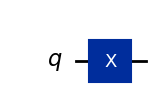

In [21]:
circ.x(0)
circ.draw('mpl')

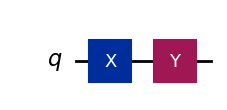

In [22]:
circ.y(0)
circ.draw('mpl')

Aumentando o número de qubits

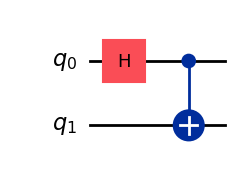

In [23]:
circ = QuantumCircuit(2)

circ.h(0)
circ.cx(0, 1)
circ.draw('mpl')

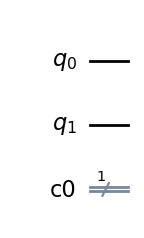

In [24]:
from qiskit import ClassicalRegister # Para medidas precisamos de um registro quântico

circ = QuantumCircuit(2)
reg = ClassicalRegister(1)
circ.add_register(reg)
circ.draw('mpl')

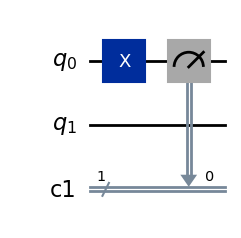

In [25]:
circ = QuantumCircuit(2)
reg = ClassicalRegister(1)
circ.add_register(reg)
circ.x(0)

# Medindo para o Registro Clássico
circ.measure(0, 0)
circ.draw('mpl')

A simulação desse sistema fica à cargo do `Aer`

In [26]:
from qiskit_aer import Aer


In [27]:
# Criando um circuito simples:
circ = QuantumCircuit(1)


circ.x(0)
#circ.y(0)
#circ.z(0)
#circ.h(0)


state_sim = Aer.get_backend('statevector_simulator')
result = state_sim.run(circ).result()
statevec = result.get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(statevec)

<IPython.core.display.Latex object>

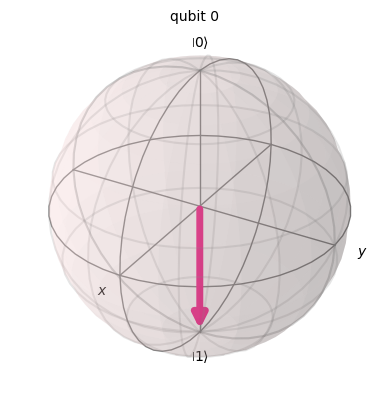

In [28]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevec)

Aplique as seguintes portas ao seu circuito:

-  X
-  Y
-  Z
-  XZ
-  XX

-  H
-  XH
-  HX


A ordem em que aplicamos cada porta importa!


Vamos agora medir os circuitos!

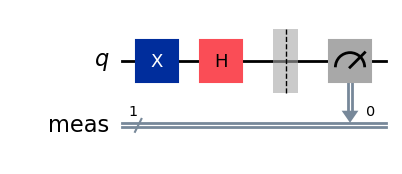

In [29]:
circ = QuantumCircuit(1)
circ.x(0)
circ.h(0)
circ.measure_all()
circ.draw('mpl')

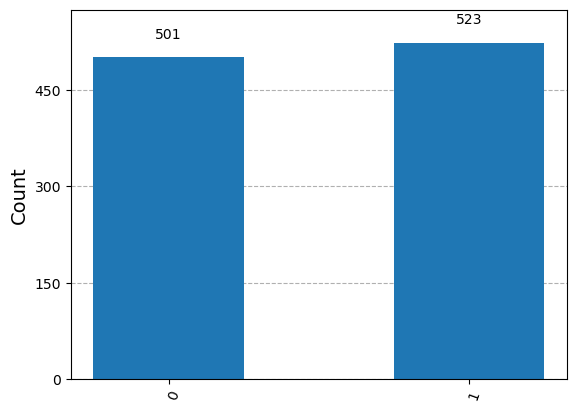

In [30]:
qasm_sim = Aer.get_backend('qasm_simulator') # Aqui estamos simulando as medições!
result = qasm_sim.run(circ).result() #shots=1000
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Portas controladas

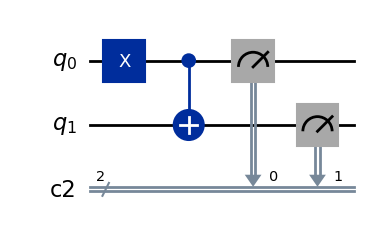

In [31]:
circ = QuantumCircuit(2)
reg = ClassicalRegister(2)
circ.add_register(reg)

circ.x(0)
# Aqui, o 1º é o qubit de controle e o 2º o alvo
circ.cx(0, 1)

circ.measure(0,0)
circ.measure(1,1)

circ.draw('mpl')

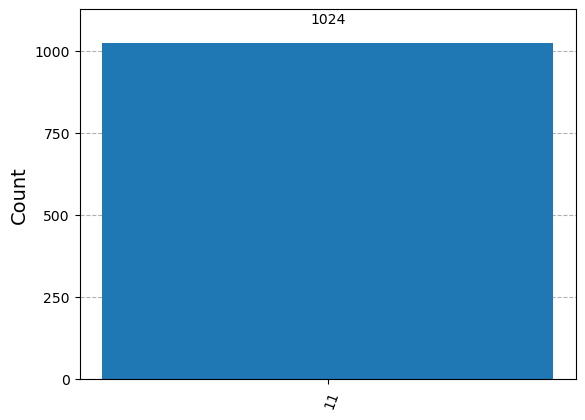

In [32]:
def my_run(circ):
    qasm_sim = Aer.get_backend('qasm_simulator') # Aqui estamos simulando as medições!
    result = qasm_sim.run(circ).result() #shots=1000
    counts = result.get_counts()
    return counts

counts = my_run(circ)

plot_histogram(counts)

# Algorítimo De Deutsch

Seja uma função binária:
$f\{0,1\} \rightarrow \{0,1\}$

Temos 4 possibilidades:

- Constante: $f\{0\} \rightarrow \{0\}; f\{1\} \rightarrow \{0\}$ e $f\{0\} \rightarrow \{1\}; f\{1\} \rightarrow \{1\}$ 

- Balnceada:  $f\{0\} \rightarrow \{0\}; f\{1\} \rightarrow \{1\}$ e $f\{0\} \rightarrow \{1\}; f\{1\} \rightarrow \{0\}$ 

Classicamente precisamos de 2 medições de f(0) e f(1), mas quanticamente, podemos usar a superposição para medir apenas uma vez



In [33]:
from qiskit import QuantumRegister

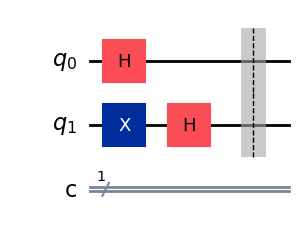

In [34]:
# Vamos precisar de 2 qubits e 1 Bit clássico
c_reg = ClassicalRegister(1, 'c')
q_reg = QuantumRegister(2, 'q')

initial = QuantumCircuit(q_reg, c_reg)


# O circuito começa com o Q_0 em 0 e Q_1 em 1
initial.x(1)

# Uma Hadamard para cada qubit

initial.h(0) # O qubit 0 é nosso Input
initial.h(1) # O qubit 1 é f(x)

initial.barrier()

initial.draw('mpl')

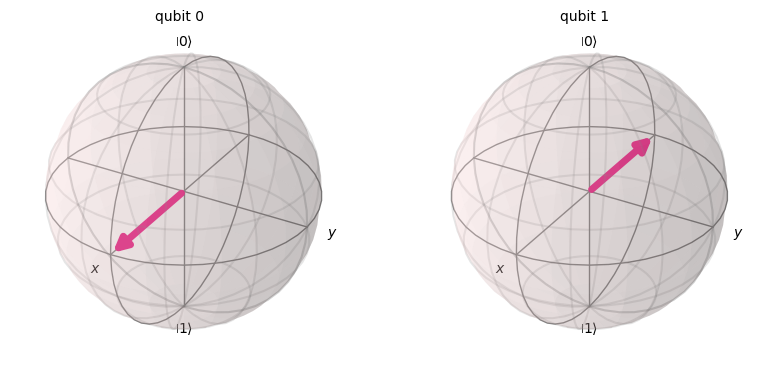

In [42]:
state_sim = Aer.get_backend('statevector_simulator')
result = state_sim.run(initial).result()
statevec = result.get_statevector()
#array_to_latex(statevec)
plot_bloch_multivector(statevec)

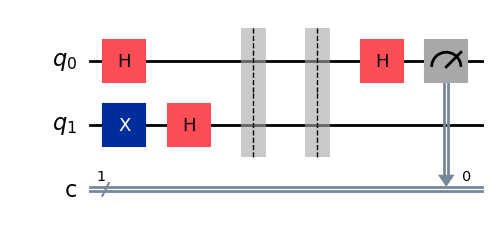

In [43]:
#Para finalizar o circuito, desejamos medir o Q_0

end = QuantumCircuit(q_reg, c_reg)
end.barrier()
end.h(0)
end.measure(0, 0)

# Juntando as duas partes
circuit = initial & end
circuit.draw('mpl')

Sendo assim, agora, se aplicarmos alguma função ela estará atuando sobre ambos os valores 0 e 1 ao mesmo tempo. Precisamos de um Oráculo.

Ele é a função que identifica e marca um estado alvo dependendo de qual o resultado

$f(|x, y\rangle) = |x, f(x) \oplus y\rangle$

se $f(x) = 0 $:
- O orácuo é a identidade


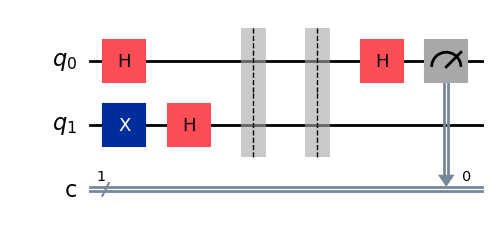

In [37]:
# Oráculo da função Constante 0 é a identidade

unbalanced0 = QuantumCircuit(q_reg, c_reg)

circuit = initial & unbalanced0 & end
circuit.draw('mpl')

se $f(x) = 1 $:
- O orácuo é a negação

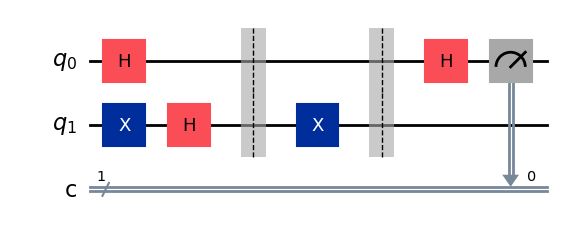

In [38]:
unbalanced1 = QuantumCircuit(q_reg, c_reg)
unbalanced1.x(1)

circuit = initial & unbalanced1 & end
circuit.draw('mpl')

Se a função for balanceada:
$f(|x, y\rangle) = |x, f(x) \oplus y\rangle = |x, x \oplus y\rangle $
Temos a  CNOT

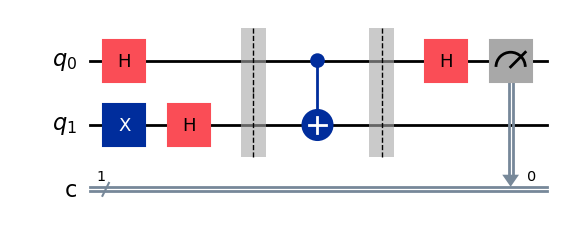

In [39]:
balanced = QuantumCircuit(q_reg, c_reg)
balanced.cx(0,1)

circuit = initial & balanced & end
circuit.draw('mpl')

In [40]:
circuits = []
for kind, oracle in (('b', balanced),
                     ('u', unbalanced0),
                     ('u', unbalanced1)):
    circuit = initial & oracle & end
    circuits.append(circuit)
    count = my_run(circuit)
    print(kind, count)


b {'1': 1024}
u {'0': 1024}
u {'0': 1024}


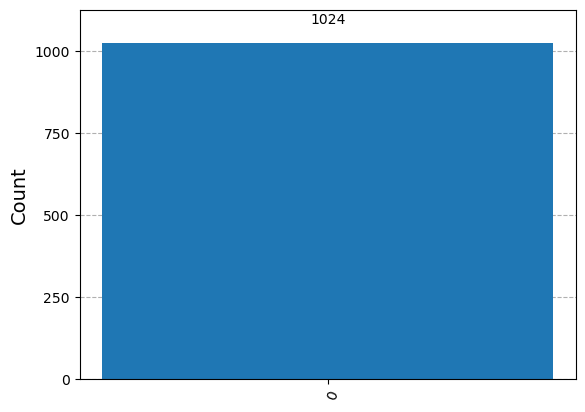

In [41]:
count = my_run(circuits[2])
plot_histogram(count)